# Zadanie domowe

W przypadku obrazów w odcieniach szarości pojedynczy piksel z zakresu [0; 255] reprezentowany jest jako 8-bitowa liczba bez znaku.
Pewnym rozszerzeniem analizy sposobu reprezentacji obrazu może być następujący eksperyment.
Załóżmy, że z każdego z 8 bitów możemy stworzyć pojedynczy obraz binarny (ang. _bit-plane slicing_).
Dla obrazka _100zloty.jpg_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/100zloty.jpg) stwórz 8 obrazów, z których każdy powinien zawierać jedną płaszczyznę bitową.
Podpowiedź $-$ warto sprawdzić, jak realizuje się bitowe operacje logiczne.
Zastosowanie takiej dekompozycji obrazu pozwala na analizę ,,ważności'' poszczególnych bitów.
Jest to użyteczne w kwantyzacji, ale także w kompresji.

W drugim etapie zadania proszę spróbować odtworzyć obraz oryginalny z mniejszej liczby obrazów binarnych.
Warto zacząć od dwóch najbardziej znaczących bitów, a później dodawać kolejne.
Należy utworzyć co najmniej trzy wersje zrekonstruowanych obrazów.
Podpowiedź $-$ rekonstrukcja obrazu to mnożenie przez odpowiednią potęgę liczby 2 (przesunięcie bitowe) oraz dodawanie.

In [1]:
import cv2
import os
import requests
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/'
fileName = '100zloty.jpg'
if not os.path.exists(fileName) :
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)

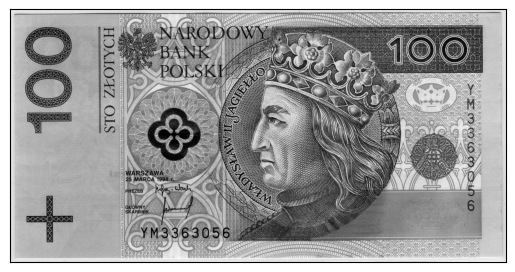

In [2]:
img = cv2.imread("100zloty.jpg", cv2.IMREAD_GRAYSCALE)
plt.gray()
plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.show()

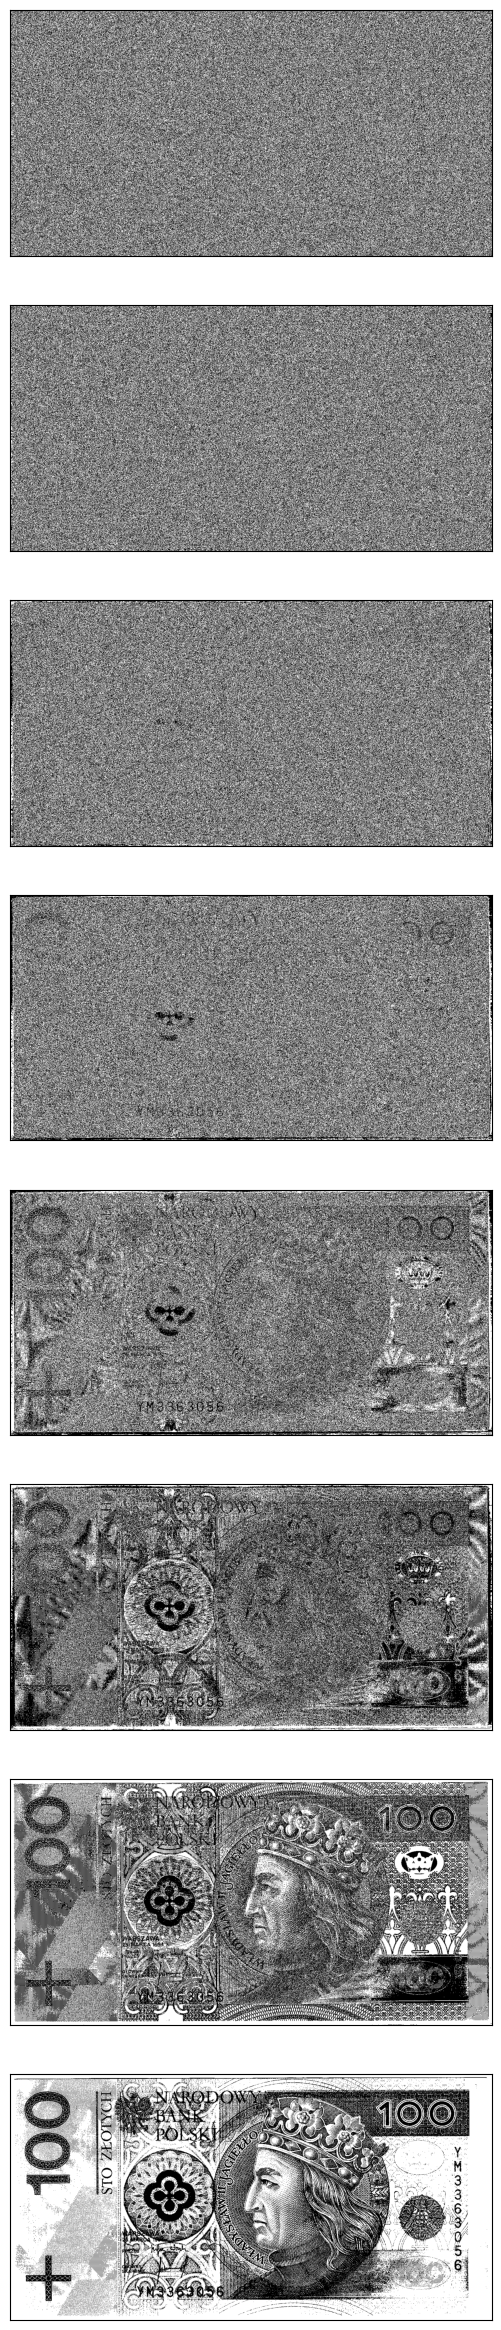

In [3]:
f, ax = plt.subplots(8, 1)
f.set_size_inches(25, 30)
bit_img = []
for i in range(8):
    img_bit = img & (1 << i)
    _, img_bit = cv2.threshold(img_bit, 0, 255, cv2.THRESH_BINARY)
    bit_img.append(img_bit)
    ax[i].imshow(img_bit)
    ax[i].set_xticks([])
    ax[i].set_yticks([])
plt.show()

In [4]:
def show_img(img):
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    plt.show()

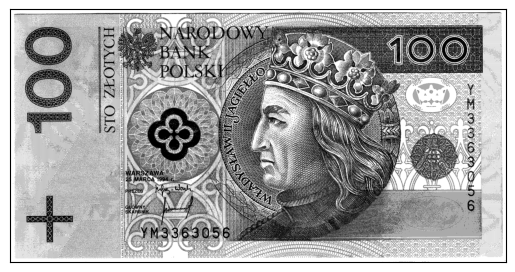

In [5]:
new_img = (bit_img[-1] & (1 << 7)) | (bit_img[-2] & (1 << 6))
show_img(new_img)

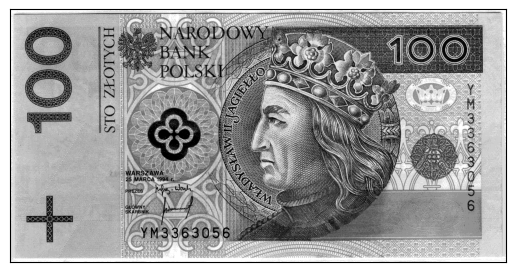

In [6]:
new_img |= (bit_img[-3] & (1 << 5))
show_img(new_img)

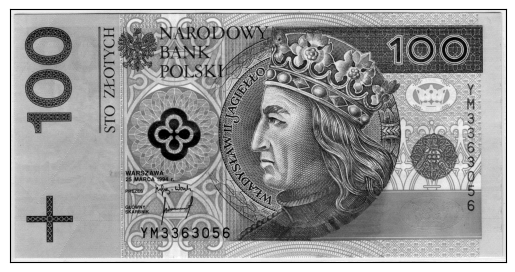

In [7]:
new_img |= (bit_img[-4] & (1 << 4))
show_img(new_img)

### A teraz w drugą stronę

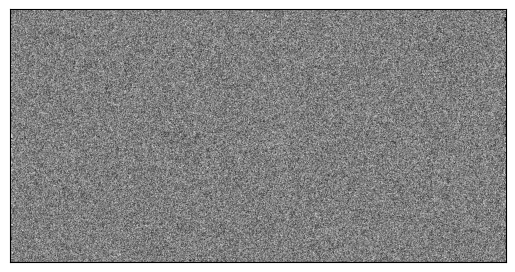

In [8]:
new_img = (bit_img[0] & 1) | (bit_img[1] & (1 << 1))
show_img(new_img)

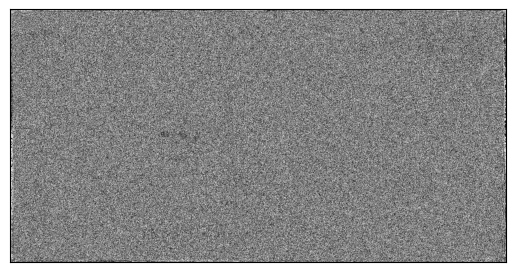

In [9]:
new_img |= bit_img[2] & (1 << 2)
show_img(new_img)

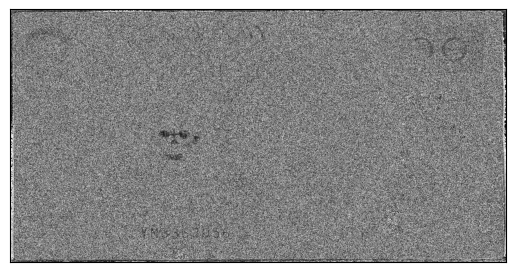

In [10]:
new_img |= bit_img[3] & (1 << 3)
show_img(new_img)

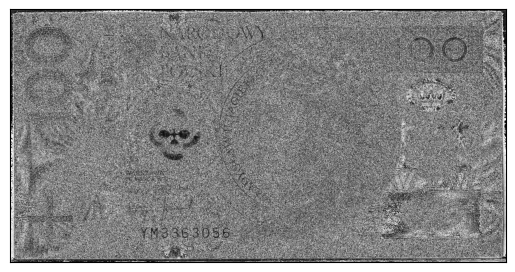

In [11]:
new_img |= bit_img[4] & (1 << 4)
show_img(new_img)